# Floating Point representation 2.0
## Thomas Shoesmith (undergraduate Research)
### using unsigned exponent to 17bit representation
### fixed alpha value

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Decimal to spike neuron (fs/fp-conversion)

In [24]:
alpha = 17


def fp_d2s(x, K = 8, elim = 4, w = 1, alpha = 20):


    man_start = alpha
    exponent = 0

    while man_start > x and exponent < 2**elim - 1:
        exponent += 1
        man_start = man_start / 2


    print("man_start:\t", man_start)   
    print("exponent:\t", exponent)   
    print("exp elim:\t", 2**elim )

    T = man_start * 2* 2**(-K) * np.array([float(2 ** (K - i)) for i in range(1, K + 1)]).astype(np.float32)

    print("T: \t\t", T)
    print("x:\t\t", x)
    print("α:\t\t", alpha)

    exponent = format(abs(exponent), "b")

    while len(exponent) < elim:
        exponent = "0" + exponent
    
    # mantessa
    z = []
    for t in T:
        if t <= x:
            x = x - t
            z.append("1")   
        else:
            z.append("0")


    man = ''.join(z)

    return exponent + man


print("output:\t\t", fp_d2s(x =  19, K = 4, elim = 4))

man_start:	 10.0
exponent:	 1
exp elim:	 16
T: 		 [10.    5.    2.5   1.25]
x:		 19
α:		 20
output:		 00011111


# Spike to Decimal neuron (fs/fp-conversion)

In [25]:
def fp_s2d(x, K = 8, elim = 4, w = 1, alpha = 20):
    exp = int(x[:elim], 2)
    man = list(x[elim:])

    man_start = alpha

    print("exp :", exp)
    print("man :", man)

    while exp > 0:
        exp -= 1
        man_start = man_start / 2
        
    print("man_start: ", man_start)   
    
    T = man_start * 2* 2**(-K) * np.array([float(2 ** (K - i)) for i in range(1, K + 1)]).astype(np.float32)

    print(T)
    # mantessa
    z = 0

    for i in range(len(man)):
        if man[i] == "1":
            z += T[i]

    return z

print(fp_s2d("00011111", K = 4, elim = 4))

exp : 1
man : ['1', '1', '1', '1']
man_start:  10.0
[10.    5.    2.5   1.25]
18.75


# Testing

In [4]:
x = fp_d2s(x = 0.0002 , K = 8, elim = 4)
print(fp_s2d(x, K = 8, elim = 4))

man_start:  0.0006103515625
exponent :  15
exp elim :  16
T:  [6.1035156e-04 3.0517578e-04 1.5258789e-04 7.6293945e-05 3.8146973e-05
 1.9073486e-05 9.5367432e-06 4.7683716e-06]
x:  0.0002
α:  20
4
exp : 15
man : ['0', '0', '1', '0', '1', '0', '0', '1']
man_start:  0.0006103515625
[6.1035156e-04 3.0517578e-04 1.5258789e-04 7.6293945e-05 3.8146973e-05
 1.9073486e-05 9.5367432e-06 4.7683716e-06]
0.00019550323486328125


# POLISHED


In [5]:
def fp_d2s(x, K = 8, elim = 4, w = 1, alpha = 20):
    if x > alpha:
        x = alpha

    man_start = alpha
    exponent = 0

    while man_start > x and exponent < 2**elim - 1:
        exponent += 1
        man_start = man_start / 2

    T = man_start * 2* 2**(-K) * np.array([float(2 ** (K - i)) for i in range(1, K + 1)]).astype(np.float32)

    exponent = format(abs(exponent), "b")

    while len(exponent) < elim:
        exponent = "0" + exponent
    
    # mantessa
    z = []
    for t in T:
        if t <= x:
            x -= t
            z.append("1")   
        else:
            z.append("0")

    man = ''.join(z)

    return exponent + man


print(fp_d2s(x = 0.0002 , K = 8, elim = 4))

111100101001


In [6]:
def fp_s2d(x, K = 8, elim = 4, w = 1, alpha = 20):
    exp = int(x[:elim], 2)
    man = list(x[elim:])

    man_start = alpha

    while exp > 0:
        exp -= 1
        man_start = man_start / 2
        
    T = man_start * 2* 2**(-K) * np.array([float(2 ** (K - i)) for i in range(1, K + 1)]).astype(np.float32)

    # mantessa
    z = 0
    for i in range(len(man)):
        if man[i] == "1":
            z += T[i]

    return z

print(fp_s2d("111100101001", K = 8, elim = 4))

0.00019550323486328125


In [7]:
def fp_d2d(x, K = 8, elim = 4, w = 1, alpha = 20):
    return(fp_s2d(fp_d2s(x, K, elim, w, alpha), K, elim, w, alpha))

fp_d2d(x = 0.002020202, w = 1)

0.0020122528076171875

In [8]:
alpha = 20

print(fp_s2d(fp_d2s(x = 9 , K = 8, elim = 4, alpha = alpha), K = 8, elim = 4, alpha = alpha))

8.984375


# plotting

In [1]:
# Few-Spikes Neuron
# x = input 
# K = timesteps K = 1, ... t 
# α = value representation range (cap)

def fs(x, K = 10, alpha = 25):
    t = 0
    fx = 0
    v =  np.zeros(K)
    z = np.zeros(K) 

    T = alpha * 2**(-K) * np.array([float(2 ** (K - i)) for i in range(1, K + 1)]).astype(np.float32)
    h = alpha * 2**(-K) * np.array([float(2 ** (K - i)) for i in range(1, K + 1)]).astype(np.float32)
    d = alpha * 2**(-K) * np.array([float(2 ** (K - i)) for i in range(1, K + 1)]).astype(np.float32)

    print(h)

    v[0] = x

    while t < K:         
        # spike if voltage > threshold, reset if spike.
        if v[t] >= T[t]:
            z[t] = 1
            v[t] = v[t] - h[t]  

        # copy over value once reduced.
        if t + 1 < K:
            v[t + 1] =  v[t] # no need to reduce further as this has already been shortened.

        # sum voltage if spike
        fx += z[t] * h[t] #* 0.5
        t += 1

    return z, fx # outputs tuple of spike train and sum (sum for configuration)

In [4]:
print(fs(7))

[12.5         6.25        3.125       1.5625      0.78125     0.390625
  0.1953125   0.09765625  0.04882812  0.02441406]
(array([0., 1., 0., 0., 0., 1., 1., 1., 1., 0.]), 6.982421875)


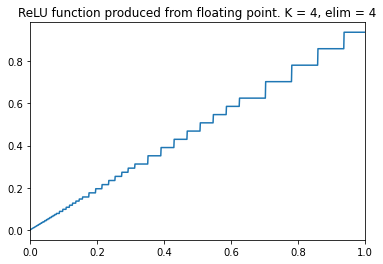

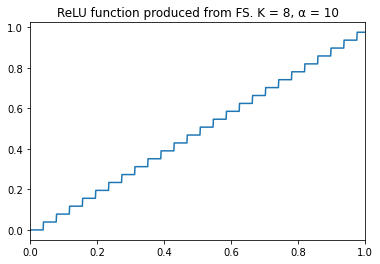

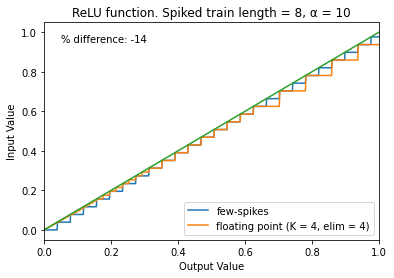

difference between input and representation from fp 22.395706103066914
difference between input and representation from fs 19.5312499263091
percentage difference between fp and fs 13.664031201076646


In [117]:
fs_ReLU = []
fp_ReLU = []

fs_diff = 0
fp_diff = 0

range1 = 0
range2 = 1
# fewer spikes neuron
fs_K = 8
fs_a = 10
# floating point neuron
fp_K = 4
fp_e = 4
fp_a = 10

weight = 1

#xlim
x1, x2 = range1, range2


x = np.linspace(range1, range2, 1000, dtype=np.float32)

for i in range(len(x)):
    fp_diff += abs(x[i] - fp_d2d(x[i], fp_K, fp_e, weight, fp_a))
    fs_diff += abs(x[i] - fs(x[i], fs_K, fs_a)[1])
    fp_ReLU.append(fp_d2d(x[i], fp_K, fp_e, weight, fp_a))
    fs_ReLU.append(fs(x[i], fs_K, fs_a)[1])

plt.plot(x, fp_ReLU)
plt.title("ReLU function produced from floating point. K = {}, elim = {}".format(fp_K, fp_e))
plt.xlim(x1, x2)
plt.show()

plt.plot(x, fs_ReLU)
plt.title("ReLU function produced from FS. K = {}, α = {}".format(fs_K, fs_a))
plt.xlim(x1, x2)
plt.show()

plt.plot(x, fs_ReLU, label= "few-spikes")
plt.plot(x, fp_ReLU, label= "floating point (K = {}, elim = {})".format(fp_K, fp_e))
plt.plot(x, x)
plt.title("ReLU function. Spiked train length = {}, α = {}".format(fs_K, fs_a))
plt.xlim(x1, x2)
plt.legend(loc = 4)
plt.text((range2/20), range2 - (range2/20),  "% difference: {}".format(round((fs_diff - fp_diff) / ((fs_diff + fp_diff)/2)*100)))
plt.ylabel("Input Value")
plt.xlabel("Output Value")
plt.show()


print("difference between input and representation from fp {}".format(fp_diff))
print("difference between input and representation from fs {}".format(fs_diff))
print("percentage difference between fp and fs {}".format(abs(fs_diff - fp_diff) / ((fs_diff + fp_diff)/2)*100))


In [ ]:
#TODO single neuron test, check spike train.

In [22]:
import bitarray.util as bu
import math
def encode(x, alpha, exp_bits, mantissa_bits):
    # Calculate maximum mantissa value
    max_exp = (2 ** exp_bits) - 1
    print(max_exp)
    # Calculate what integer equivalent of mantissa of one will be
    mantissa_one = 2 ** mantissa_bits  #TODO function POW(2'.. check
    print(mantissa_one)
    # Get fraction of alpha we need to encode
    relative_x = x / alpha
    print(relative_x)
    assert relative_x < 1.0
    print(relative_x)
    # Calculate integer exponent (will be < 1) and clamp
    if x != 0:
        exponent = math.ceil(math.log2(relative_x)) #TODO look into log2 and ceil
        print(exponent)
        exponent = max(-max_exp, min(0, exponent)) #TODO math
        print(exponent)
    #exponent = 0 if x == 0: else exponent = 19
    # Calculate value this exponent will represent
    exponent_value = 2 ** exponent
    print("exponent value:", exponent_value)


    # Calculate floating point mantissa value
    mantissa = relative_x / exponent_value
    print(mantissa)
    assert mantissa < 1.0
    # Convert mantissa to fixed point bitarray and (negated) exponent to bitarray
    return (bu.int2ba(round(mantissa * mantissa_one), length=mantissa_bits),
            bu.int2ba(-exponent, length=exp_bits))
            
def decode(value, alpha):
    # Calculate what integer equivalent of mantissa of one will be
    mantissa_one = 2.0 ** len(value[0])
    # Extract components
    exp = bu.ba2int(value[1])
    mantissa = bu.ba2int(value[0])
    # Re-assemble floating point value
    return alpha * (2.0 ** -exp) * (mantissa / mantissa_one)
alpha = 20.0
code = encode(19, alpha, 4, 4)
print(code)
print(decode(code, alpha))

15
16
0.95
0.95
0
0
exponent value: 1
0.95
(bitarray('1111'), bitarray('0000'))
18.75
